### <b>PART I : CNN Classification</b>

In this part implement VGG. It is one of the commonly used CNN architectures. It has different versions and, in this part, we implement the `VGG-13 (Version B)` and apply it to solve an image dataset containing three classes: dogs, cars and food. The expected accuracy for this part is more than `75%` without optimization techniques and `80%` with optimization techniques.

### <b>STEPS :</b>

1. Data preprocessing: <br>
a. Read, preprocess, and print the main statistics about the dataset<br>
b. Using any data visualization library (e.g. matplotlib, seaborn, plotly), provide at least 2 visualization graphs related to your dataset.</br>
c. Prepare the dataset for training, e.g. normalizing, converting target to categorical values and splitting it into training, testing and validation sets.

In [ ]:
'''
NOTE : Some Parts of this assignment are referenced from "Assignment 2 - CSE 574
- Intro. to ML - done by SOUBHIK SINHA (soubhiks) & SHIRISHA REDDY BANDARI (shirisha)"
'''

# Importing necessary libraries

import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Let us first mount the google drive to the colab environment

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Creating empty lists to store images and labels

data_images = []
labels_images = []

In [ ]:
# Unzipping the ZIP File / Folder

!unzip '/content/drive/MyDrive/Datasets/cnn_dataset_dl_Part1.zip' -d '/content/drive/MyDrive/Datasets/cnn_dataset_DL_Part1_extracted'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Datasets/cnn_dataset_DL_Part1_extracted/vehicles/5499.jpg  
  inflating: /content/drive/MyDrive/Datasets/cnn_dataset_DL_Part1_extracted/vehicles/55.jpg  
  inflating: /content/drive/MyDrive/Datasets/cnn_dataset_DL_Part1_extracted/vehicles/550.jpg  
  inflating: /content/drive/MyDrive/Datasets/cnn_dataset_DL_Part1_extracted/vehicles/5500.jpg  
  inflating: /content/drive/MyDrive/Datasets/cnn_dataset_DL_Part1_extracted/vehicles/5501.jpg  
  inflating: /content/drive/MyDrive/Datasets/cnn_dataset_DL_Part1_extracted/vehicles/5502.jpg  
  inflating: /content/drive/MyDrive/Datasets/cnn_dataset_DL_Part1_extracted/vehicles/5503.jpg  
  inflating: /content/drive/MyDrive/Datasets/cnn_dataset_DL_Part1_extracted/vehicles/5504.jpg  
  inflating: /content/drive/MyDrive/Datasets/cnn_dataset_DL_Part1_extracted/vehicles/5505.jpg  
  inflating: /content/drive/MyDrive/Datasets/cnn_dataset_DL_Part1_extracted/vehicles/550

In [ ]:
dataset_folder_path = '/content/drive/MyDrive/Datasets/cnn_dataset_DL_Part1_extracted'

In [ ]:
# Looping through the sub-folders and loading images

for sub_folder_name in os.listdir(dataset_folder_path):
    sub_folder_path = os.path.join(dataset_folder_path, sub_folder_name)

    # Checking if it's a directory
    if os.path.isdir(sub_folder_path):
        label = sub_folder_name  # The folder name is the label (character)

        for image_file in os.listdir(sub_folder_path):
            image_path = os.path.join(sub_folder_path, image_file)

            # Load and process the image using PIL
            image = Image.open(image_path)
            # image = image.convert("L")  # Converting to grayscale if needed
            image = np.array(image)  # Converting to a numpy array

            # Appending the image(s) and its label to the lists
            data_images.append(image)
            labels_images.append(label)

In [ ]:
# Converting the image and label lists to numpy arrays for further processing

images = np.array(data_images)
labels = np.array(labels_images)

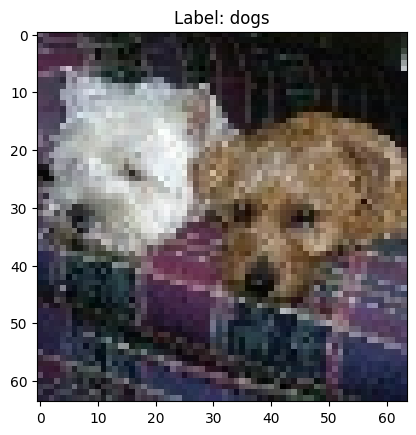

In [ ]:
# Lets have a look to one of the images that were loaded
# in the previous steps - just to verify and confirm that we are good to go !

plt.imshow(images[69], cmap='gray')
plt.title(f"Label: {labels[69]}")
plt.show()

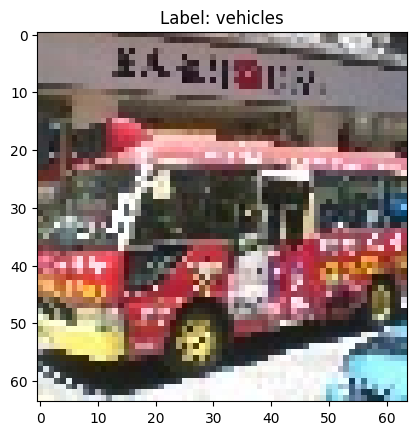

In [ ]:
# Printing another image

plt.imshow(images[25005], cmap='gray')
plt.title(f"Label: {labels[25005]}")
plt.show()

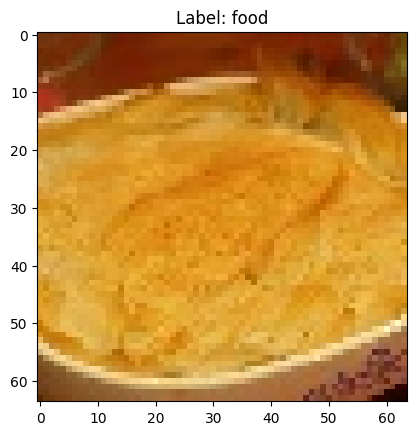

In [ ]:
# Printing another image

plt.imshow(images[11000], cmap='gray')
plt.title(f"Label: {labels[11000]}")
plt.show()

In [ ]:
# Let us print the shape of the lists

print(f"Data : {images.shape}")
print(f"Labels : {labels.shape}")

Data : (30000, 64, 64, 3)
Labels : (30000,)


In [ ]:
# This says that we have 3 classes - dogs, vehicles (cars) and food
# Each having 10000 images - so together we have 30000 images

In [ ]:
# Let's pre-process the data

# We will be using "Normalization" to pre-process our image data (also we need
# to take care that we don'y change the shape of the lists)

normalized_data_images = images / 255.0

# We need to have the labels for the normalized images
normalized_labels = labels

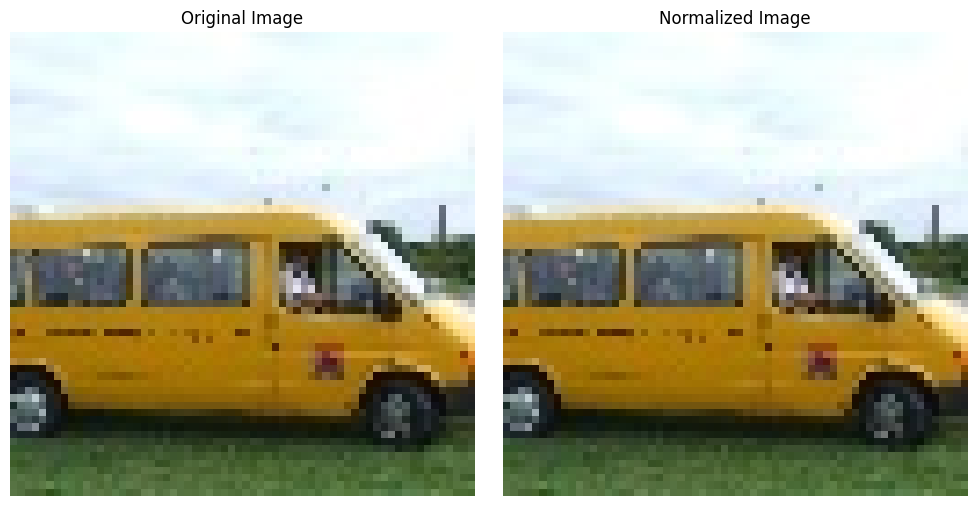

In [ ]:
# I want to check whether the images are normalized or not
# by showing one of the images from the list

# Choosing an index to visualize a specific image
index_to_visualize = 26545

# Original image
original_image = images[index_to_visualize]

# Normalized image
normalized_image = normalized_data_images[index_to_visualize]

# Plotting both images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image, cmap='gray')
plt.title("Normalized Image")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# One thing we need to do here is One-Hot Encoding all the labels
# present

# The reason is - the Custom CNN model won't be accepting characters as labels
# but rather numbers (to be specific - integers). Thus they are to to changed

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Fitting and transforming the labels to integer values
integer_labels = label_encoder.fit_transform(normalized_labels)

# Initializing the OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

In [ ]:
# Fitting and transforming the integer labels to one-hot encoding
one_hot_labels = one_hot_encoder.fit_transform(integer_labels.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Lets check whether the labels have actually been encoded or not (we will only
# consider the integer labels rather than One-Hot Encoded labels - to reduce
# complexity)

# If we recall, the original labels list started with "dogs", "food" and "vehicles"

# Under every label they have 10000 images. So till 10000 X 3 = 30000 images

integer_labels[28000]

2

In [ ]:
# Hence, we are confirmed that the labels have under-gone
# One-Hot Encoding

In [ ]:
# Lets analyze & visualize the dataset

'''
Data Summary Statistics - mean, standard deviation, and data distribution
'''

# Computing mean and standard deviation
mean = np.mean(normalized_data_images)
std = np.std(normalized_data_images)

print(f"Mean : {mean}")
print(f"Std (STANDARD DEVIATION) : {std}")

from scipy import stats

# Median
median = np.median(normalized_data_images)

# Mode
mode_result = stats.mode(normalized_data_images)
mode = mode_result.mode[0]

# Variance
variance = np.var(normalized_data_images)

# Range
data_range = np.ptp(normalized_data_images)

# Interquartile Range (IQR)
q1 = np.percentile(normalized_data_images, 25)
q3 = np.percentile(normalized_data_images, 75)
iqr = q3 - q1

print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Variance: {variance}")
print(f"Range: {data_range}")
print(f"IQR: {iqr}")

Mean : 0.4463083186955339
Std (STANDARD DEVIATION) : 0.2765855015060835
Median: 0.42745098039215684
Mode: [[1. 1. 1.]
 [1. 1. 0.]
 [1. 1. 1.]
 [1. 1. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Variance: 0.07649953964337172
Range: 1.0
IQR: 0.4509803921568627


In [ ]:
# Data distribution - over all the labels existing

unique_labels, label_counts = np.unique(integer_labels, return_counts=True)
print(f"UNIQUE LABELS : {unique_labels}")
print(f"LABELS COUNTS : {label_counts}")

UNIQUE LABELS : [0 1 2]
LABELS COUNTS : [10000 10000 10000]


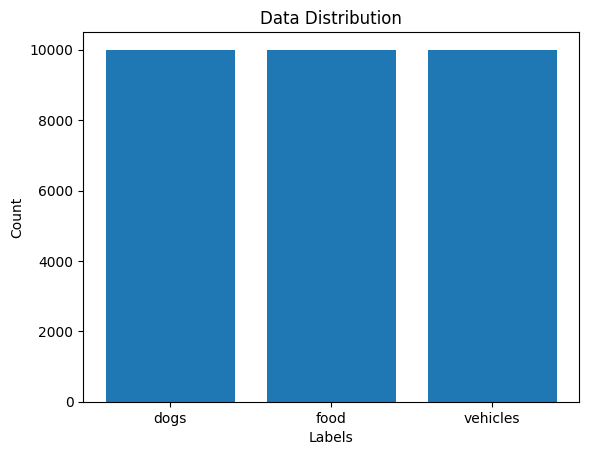

In [ ]:
'''
Visualization - a bar chart showing the frequency of each class.
'''

# Plotting the data distribution
unique_labs_ori = np.unique(np.array(labels_images))
plt.bar(unique_labs_ori, label_counts)
plt.xlabel('Labels') # For the time being we are considering the original labels
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()

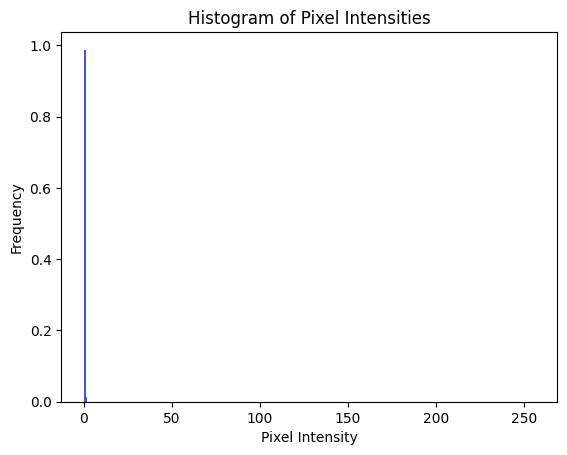

In [ ]:
'''
Visualization - Histogram of Pixel Intensities
'''

plt.hist(normalized_data_images.flatten(), bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensities')
plt.show()

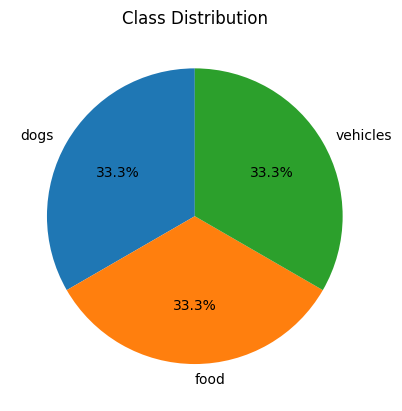

In [ ]:
'''
Visualization - Class Distribution Chart
'''

plt.pie(label_counts, labels=unique_labs_ori, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.show()

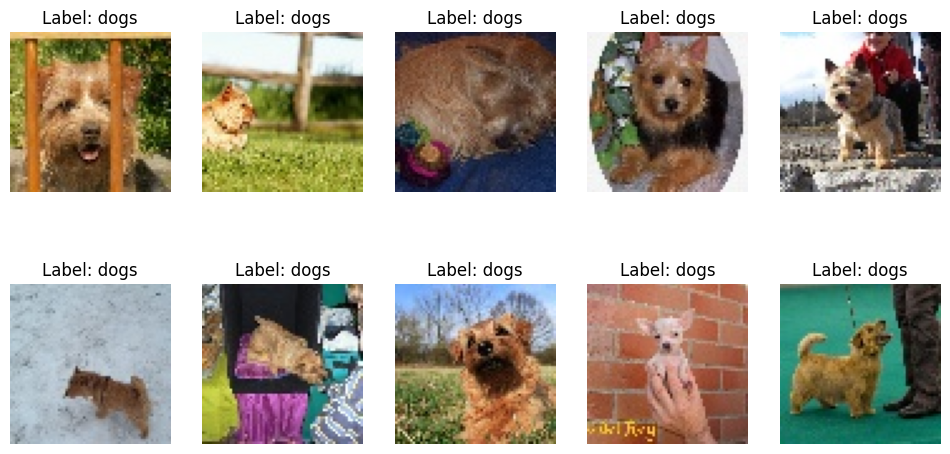

In [ ]:
'''
Data Exploration - displaying mutiple images
'''

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(normalized_data_images[i], cmap='gray')
    ax.set_title(f"Label: {normalized_labels[i]}")
    ax.axis('off')
plt.show()

In [ ]:
# Now that we are done with data loading, pre-processing, analysis
# and visualization - its time to divide the dataset
# into training, validation and testing dataset components

from sklearn.model_selection import train_test_split

# Splitting the dataset into a combined training and testing set (90%) and a validation set (10%)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(normalized_data_images, integer_labels, test_size=0.10, random_state=42)

# Further splitting the combined training and testing set into a training set (80%) and a validation set (10%)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.1111, random_state=42)

In [ ]:
# Printing the sizes of the resulting sets

print("Training set size (X_train):", X_train.shape)
print("Validation set size (X_valid):", X_valid.shape)
print("Testing set size (X_test):", X_test.shape)
print("\n")
print("Training set size (y_train):", y_train.shape)
print("Validation set size (y_valid):", y_valid.shape)
print("Testing set size (y_test):", y_test.shape)

Training set size (X_train): (24000, 64, 64, 3)
Validation set size (X_valid): (3000, 64, 64, 3)
Testing set size (X_test): (3000, 64, 64, 3)


Training set size (y_train): (24000,)
Validation set size (y_valid): (3000,)
Testing set size (y_test): (3000,)


2. Implement the VGG-13 (Version B)
architecture following the proposed
architecture. Be sure to use the
same kernel sizes, stride, and
padding as specified in the paper.
You can refer to the original VGG
paper for more details.

In [ ]:
# Importing required libraries

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torch.optim as optim

<br>
<br>

2. Implement the VGG-13 (Version B)
architecture following the proposed
architecture. Be sure to use the
same kernel sizes, stride, and
padding as specified in the paper.
You can refer to the original VGG
paper for more details.

In [ ]:
# Implementing the VGG-13 (Version B) architecture

import torch
import torch.nn as nn
import torch.nn.functional as F

class VGG13(nn.Module):
    def __init__(self):
        super(VGG13, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        # self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 2 * 2, 4096),
            nn.ReLU(True),
            # nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            # nn.Dropout(),
            # nn.Linear(4096, 1000),
            nn.Linear(4096, 3)  # 3 output classes
            # nn.ReLU(True),
            # nn.Dropout(),
            # nn.Linear(1000, 3)
        )
        # self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        x = self.features(x)
        # x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        # x = self.softmax(x)
        return x

In [ ]:
# Creating an instance of the VGG13 model
model_base = VGG13().cuda()

In [ ]:
# Checking if CUDA (GPU support) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# Displaying the model architecture

print(model_base)

VGG13(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(

In [ ]:
!pip install torchinfo

In [ ]:
# Printing the model summary - in a more specific manner

from torchinfo import summary

summary(model_base, (64, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
VGG13                                    [64, 3]                   --
├─Sequential: 1-1                        [64, 512, 2, 2]           --
│    └─Conv2d: 2-1                       [64, 64, 64, 64]          1,792
│    └─BatchNorm2d: 2-2                  [64, 64, 64, 64]          128
│    └─ReLU: 2-3                         [64, 64, 64, 64]          --
│    └─Conv2d: 2-4                       [64, 64, 64, 64]          36,928
│    └─BatchNorm2d: 2-5                  [64, 64, 64, 64]          128
│    └─ReLU: 2-6                         [64, 64, 64, 64]          --
│    └─MaxPool2d: 2-7                    [64, 64, 32, 32]          --
│    └─Conv2d: 2-8                       [64, 128, 32, 32]         73,856
│    └─BatchNorm2d: 2-9                  [64, 128, 32, 32]         256
│    └─ReLU: 2-10                        [64, 128, 32, 32]         --
│    └─Conv2d: 2-11                      [64, 128, 32, 32]         147,

In [ ]:
# Training the model on the dataset splitted

# Defining the dataset and dataloaders for training, validation, and testing

# The model shall only accept 3 channels (RGB), thus need to reshape
# accordingly
X_train = X_train.reshape(24000, 3, 64, 64)
X_valid = X_valid.reshape(3000, 3, 64, 64)
X_test = X_test.reshape(3000, 3, 64, 64)

from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
valid_dataset = TensorDataset(torch.from_numpy(X_valid).float(), torch.from_numpy(y_valid).float())
test_dataset = TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [ ]:
# Creating data loaders for training, validation and testing components

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

In [ ]:
# Defining the model, loss function, and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_base.parameters(), lr=0.001, momentum = 0.9)

In [ ]:
# Lists to store losses and accuracies

train_losses_base = []
valid_losses_base = []
train_accuracies_base = []
valid_accuracies_base = []

<br><br>

3. Train the model on a dataset
provided at UBlearns. For your
dataset, adjust the size, e.g. for the
input and the output layers.

In [ ]:
train_predicted_labels = []
train_true_labels = []
validation_predicted_labels = []
validation_true_labels = []

num_epochs = 10

for epoch in range(num_epochs):
    # Training loop
    model_base.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    train_predicted_labels = []
    train_true_labels = []

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        inputs, labels = inputs.cuda(), labels.cuda()  # Moving data to GPU
        outputs = model_base(inputs.float())
        labels = labels.to(torch.int64)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        train_predicted_labels.extend(predicted.cpu().numpy())
        train_true_labels.extend(labels.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    # Validation loop
    model_base.eval()
    running_loss = 0.0
    correct_valid = 0
    total_valid = 0
    validation_predicted_labels = []
    validation_true_labels = []

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.cuda(), labels.cuda()  # Moving data to GPU
            outputs = model_base(inputs.float())
            labels = labels.to(torch.int64)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_valid += labels.size(0)
            correct_valid += (predicted == labels).sum().item()

            validation_predicted_labels.extend(predicted.cpu().numpy())
            validation_true_labels.extend(labels.cpu().numpy())

    valid_loss = running_loss / len(valid_loader)
    valid_accuracy = 100 * correct_valid / total_valid

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Valid Loss: {valid_loss:.4f} - Train Acc: {train_accuracy:.2f}% - Valid Acc: {valid_accuracy:.2f}%")

    # Storing losses and accuracies for later analysis
    train_losses_base.append(train_loss)
    valid_losses_base.append(valid_loss)
    train_accuracies_base.append(train_accuracy)
    valid_accuracies_base.append(valid_accuracy)


Epoch 1/10 - Train Loss: 0.6020 - Valid Loss: 0.4738 - Train Acc: 74.79% - Valid Acc: 80.60%
Epoch 2/10 - Train Loss: 0.4322 - Valid Loss: 0.4168 - Train Acc: 82.71% - Valid Acc: 83.37%
Epoch 3/10 - Train Loss: 0.3744 - Valid Loss: 0.3876 - Train Acc: 85.13% - Valid Acc: 84.37%
Epoch 4/10 - Train Loss: 0.3390 - Valid Loss: 0.4155 - Train Acc: 86.63% - Valid Acc: 83.13%
Epoch 5/10 - Train Loss: 0.2918 - Valid Loss: 0.4141 - Train Acc: 88.78% - Valid Acc: 83.63%
Epoch 6/10 - Train Loss: 0.2476 - Valid Loss: 0.4165 - Train Acc: 90.66% - Valid Acc: 84.07%
Epoch 7/10 - Train Loss: 0.2102 - Valid Loss: 0.5780 - Train Acc: 92.07% - Valid Acc: 78.83%
Epoch 8/10 - Train Loss: 0.1675 - Valid Loss: 0.4366 - Train Acc: 93.63% - Valid Acc: 83.63%
Epoch 9/10 - Train Loss: 0.1306 - Valid Loss: 0.7502 - Train Acc: 95.14% - Valid Acc: 78.80%
Epoch 10/10 - Train Loss: 0.1041 - Valid Loss: 0.5969 - Train Acc: 96.23% - Valid Acc: 82.53%


In [ ]:
# Let us test the model

test_losses_base = []
test_accuracies_base = []

# Testing loop
model_base.eval()
running_loss = 0.0
correct_test = 0
total_test = 0
test_predicted_labels_base = []
test_true_labels_base = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.cuda(), labels.cuda()  # Moving data to GPU
        outputs = model_base(inputs.float())
        labels = labels.to(torch.int64)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        test_predicted_labels_base.extend(predicted.cpu().numpy())
        test_true_labels_base.extend(labels.cpu().numpy())

test_loss = running_loss / len(test_loader)
test_accuracy = 100 * correct_test / total_test

print(f"Epoch {epoch+1}/{num_epochs} - Test Loss: {test_loss:.4f} - Test Acc: {test_accuracy:.2f}%")

test_losses_base.append(test_loss)
test_accuracies_base.append(test_accuracy)

Epoch 10/10 - Test Loss: 0.5856 - Test Acc: 82.60%


4. Apply techniques to prevent
overfitting and improve the results.
Discuss each of the techniques you
have used and how they impact the
performance:<br>
a. Regularization: Apply
regularization techniques, such
as L1 or L2 regularization, to the
model's parameters.<br>
b. Dropout: Introduce dropout
layers between the fully connected layers.<br>
c. Early stopping: Monitor the performance of the model on a validation set and stop training when the validation loss stops improving.<br>
d. Image augmentation

In [ ]:
'''
L2 Regularization
'''

# Instantiating the model
model_1 = VGG13().cuda()

In [ ]:
# Defining loss function
criterion_1 = nn.CrossEntropyLoss()

In [ ]:
# Defining optimizer with L2 regularization
optimizer_1 = optim.SGD(model_1.parameters(), lr=0.01, weight_decay=0.001)  # weight_decay is the regularization strength

In [ ]:
# Lists to store losses and accuracies

train_losses_1 = []
valid_losses_1 = []
train_accuracies_1 = []
valid_accuracies_1 = []

In [ ]:
train_predicted_labels_1 = []
train_true_labels_1 = []
validation_predicted_labels_1 = []
validation_true_labels_1 = []

num_epochs = 10

for epoch in range(num_epochs):
    # Training loop
    model_1.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    train_predicted_labels_1 = []
    train_true_labels_1 = []

    for inputs, labels in train_loader:
        optimizer_1.zero_grad()
        inputs, labels = inputs.cuda(), labels.cuda()  # Moving data to GPU
        outputs = model_1(inputs.float())
        labels = labels.to(torch.int64)
        loss = criterion_1(outputs, labels)
        loss.backward()
        optimizer_1.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        train_predicted_labels_1.extend(predicted.cpu().numpy())
        train_true_labels_1.extend(labels.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    # Validation loop
    model_1.eval()
    running_loss = 0.0
    correct_valid = 0
    total_valid = 0
    validation_predicted_labels_1 = []
    validation_true_labels_1 = []

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.cuda(), labels.cuda()  # Moving data to GPU
            outputs = model_1(inputs.float())
            labels = labels.to(torch.int64)
            loss = criterion_1(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_valid += labels.size(0)
            correct_valid += (predicted == labels).sum().item()

            validation_predicted_labels_1.extend(predicted.cpu().numpy())
            validation_true_labels_1.extend(labels.cpu().numpy())

    valid_loss = running_loss / len(valid_loader)
    valid_accuracy = 100 * correct_valid / total_valid

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Valid Loss: {valid_loss:.4f} - Train Acc: {train_accuracy:.2f}% - Valid Acc: {valid_accuracy:.2f}%")

    # Storing losses and accuracies for later analysis
    train_losses_1.append(train_loss)
    valid_losses_1.append(valid_loss)
    train_accuracies_1.append(train_accuracy)
    valid_accuracies_1.append(valid_accuracy)


Epoch 1/10 - Train Loss: 0.6006 - Valid Loss: 0.4886 - Train Acc: 74.83% - Valid Acc: 79.77%
Epoch 2/10 - Train Loss: 0.4462 - Valid Loss: 0.4590 - Train Acc: 82.22% - Valid Acc: 80.83%
Epoch 3/10 - Train Loss: 0.3956 - Valid Loss: 0.4184 - Train Acc: 84.17% - Valid Acc: 82.60%
Epoch 4/10 - Train Loss: 0.3522 - Valid Loss: 0.4202 - Train Acc: 86.15% - Valid Acc: 82.73%
Epoch 5/10 - Train Loss: 0.3148 - Valid Loss: 0.5036 - Train Acc: 87.67% - Valid Acc: 80.87%
Epoch 6/10 - Train Loss: 0.2774 - Valid Loss: 0.6152 - Train Acc: 89.25% - Valid Acc: 77.00%
Epoch 7/10 - Train Loss: 0.2376 - Valid Loss: 0.4438 - Train Acc: 90.92% - Valid Acc: 84.37%
Epoch 8/10 - Train Loss: 0.1908 - Valid Loss: 0.5062 - Train Acc: 92.80% - Valid Acc: 82.40%
Epoch 9/10 - Train Loss: 0.1644 - Valid Loss: 0.4688 - Train Acc: 93.67% - Valid Acc: 84.10%
Epoch 10/10 - Train Loss: 0.1355 - Valid Loss: 0.5019 - Train Acc: 94.88% - Valid Acc: 83.73%


In [ ]:
# Let us test the model

test_losses_1 = []
test_accuracies_1 = []

# Testing loop
model_1.eval()
running_loss = 0.0
correct_test = 0
total_test = 0
test_predicted_labels_1 = []
test_true_labels_1 = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.cuda(), labels.cuda()  # Moving data to GPU
        outputs = model_1(inputs.float())
        labels = labels.to(torch.int64)
        loss = criterion_1(outputs, labels)
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        test_predicted_labels_1.extend(predicted.cpu().numpy())
        test_true_labels_1.extend(labels.cpu().numpy())

test_loss = running_loss / len(test_loader)
test_accuracy = 100 * correct_test / total_test

print(f"Epoch {epoch+1}/{num_epochs} - Test Loss: {test_loss:.4f} - Test Acc: {test_accuracy:.2f}%")

test_losses_1.append(test_loss)
test_accuracies_1.append(test_accuracy)

Epoch 10/10 - Test Loss: 0.5236 - Test Acc: 82.97%


In [ ]:
'''
Introduction of Dropout in FC layers
'''

class VGG13_DropOut(nn.Module):
    def __init__(self, dropout_prob=0.2):
        super(VGG13_DropOut, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        # self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 2 * 2, 4096),
            nn.ReLU(True),
            nn.Dropout(dropout_prob),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(dropout_prob),
            # nn.Linear(4096, 1000),
            nn.Linear(4096, 3)  # 3 output classes
            # nn.ReLU(True),
            # nn.Dropout(),
            # nn.Linear(1000, 3)
        )
        # self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        x = self.features(x)
        # x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        # x = self.softmax(x)
        return x

In [ ]:
# Instantiating the model
model_2 = VGG13_DropOut().cuda()

In [ ]:
# Defining loss function
criterion_2 = nn.CrossEntropyLoss()

In [ ]:
# Defining optimizer with L2 regularization
optimizer_2 = optim.SGD(model_2.parameters(), lr=0.01, weight_decay=0.001)  # weight_decay is the regularization strength

In [ ]:
# Lists to store losses and accuracies

train_losses_2 = []
valid_losses_2 = []
train_accuracies_2 = []
valid_accuracies_2 = []

In [ ]:
train_predicted_labels_2 = []
train_true_labels_2 = []
validation_predicted_labels_2 = []
validation_true_labels_2 = []

num_epochs = 10

for epoch in range(num_epochs):
    # Training loop
    model_2.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    train_predicted_labels_2 = []
    train_true_labels_2 = []

    for inputs, labels in train_loader:
        optimizer_2.zero_grad()
        inputs, labels = inputs.cuda(), labels.cuda()  # Moving data to GPU
        outputs = model_2(inputs.float())
        labels = labels.to(torch.int64)
        loss = criterion_2(outputs, labels)
        loss.backward()
        optimizer_2.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        train_predicted_labels_2.extend(predicted.cpu().numpy())
        train_true_labels_2.extend(labels.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    # Validation loop
    model_2.eval()
    running_loss = 0.0
    correct_valid = 0
    total_valid = 0
    validation_predicted_labels_2 = []
    validation_true_labels_2 = []

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.cuda(), labels.cuda()  # Moving data to GPU
            outputs = model_2(inputs.float())
            labels = labels.to(torch.int64)
            loss = criterion_2(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_valid += labels.size(0)
            correct_valid += (predicted == labels).sum().item()

            validation_predicted_labels_2.extend(predicted.cpu().numpy())
            validation_true_labels_2.extend(labels.cpu().numpy())

    valid_loss = running_loss / len(valid_loader)
    valid_accuracy = 100 * correct_valid / total_valid

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Valid Loss: {valid_loss:.4f} - Train Acc: {train_accuracy:.2f}% - Valid Acc: {valid_accuracy:.2f}%")

    # Storing losses and accuracies for later analysis
    train_losses_2.append(train_loss)
    valid_losses_2.append(valid_loss)
    train_accuracies_2.append(train_accuracy)
    valid_accuracies_2.append(valid_accuracy)


Epoch 1/10 - Train Loss: 0.5915 - Valid Loss: 0.4854 - Train Acc: 75.22% - Valid Acc: 79.77%
Epoch 2/10 - Train Loss: 0.4451 - Valid Loss: 0.4632 - Train Acc: 82.20% - Valid Acc: 81.97%
Epoch 3/10 - Train Loss: 0.3941 - Valid Loss: 0.4328 - Train Acc: 84.26% - Valid Acc: 83.07%
Epoch 4/10 - Train Loss: 0.3543 - Valid Loss: 0.4188 - Train Acc: 85.97% - Valid Acc: 83.03%
Epoch 5/10 - Train Loss: 0.3134 - Valid Loss: 0.3810 - Train Acc: 87.70% - Valid Acc: 85.27%
Epoch 6/10 - Train Loss: 0.2787 - Valid Loss: 0.3769 - Train Acc: 89.08% - Valid Acc: 85.30%
Epoch 7/10 - Train Loss: 0.2357 - Valid Loss: 0.4587 - Train Acc: 90.83% - Valid Acc: 83.07%
Epoch 8/10 - Train Loss: 0.2013 - Valid Loss: 0.4336 - Train Acc: 92.15% - Valid Acc: 83.70%
Epoch 9/10 - Train Loss: 0.1529 - Valid Loss: 0.4734 - Train Acc: 94.19% - Valid Acc: 84.37%
Epoch 10/10 - Train Loss: 0.1291 - Valid Loss: 0.5833 - Train Acc: 95.15% - Valid Acc: 81.87%


In [ ]:
# Let us test the model

test_losses_2 = []
test_accuracies_2 = []

# Testing loop
model_2.eval()
running_loss = 0.0
correct_test = 0
total_test = 0
test_predicted_labels_2 = []
test_true_labels_2 = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.cuda(), labels.cuda()  # Moving data to GPU
        outputs = model_2(inputs.float())
        labels = labels.to(torch.int64)
        loss = criterion_2(outputs, labels)
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        test_predicted_labels_2.extend(predicted.cpu().numpy())
        test_true_labels_2.extend(labels.cpu().numpy())

test_loss = running_loss / len(test_loader)
test_accuracy = 100 * correct_test / total_test

print(f"Epoch {epoch+1}/{num_epochs} - Test Loss: {test_loss:.4f} - Test Acc: {test_accuracy:.2f}%")

test_losses_2.append(test_loss)
test_accuracies_2.append(test_accuracy)

Epoch 10/10 - Test Loss: 0.5923 - Test Acc: 81.47%


In [ ]:
'''
EARLY STOPPING
'''

# Instantiating the model
model_3 = VGG13_DropOut().cuda()

In [ ]:
# Defining loss function
criterion_3 = nn.CrossEntropyLoss()

In [ ]:
# Defining optimizer with L2 regularization
optimizer_3 = optim.SGD(model_3.parameters(), lr=0.01, weight_decay=0.001)  # weight_decay is the regularization strength

In [ ]:
# Lists to store losses and accuracies

train_losses_3 = []
valid_losses_3 = []
train_accuracies_3 = []
valid_accuracies_3 = []

In [ ]:
# Defining variables for early stopping
early_stopping_patience = 5  # Number of epochs to wait for improvement
best_valid_loss = np.inf
epochs_no_improve = 0
best_model_state_dict = None

In [ ]:
train_predicted_labels_3 = []
train_true_labels_3 = []
validation_predicted_labels_3 = []
validation_true_labels_3 = []

num_epochs = 10

for epoch in range(num_epochs):
    # Training loop
    model_3.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    train_predicted_labels_3 = []
    train_true_labels_3 = []

    for inputs, labels in train_loader:
        optimizer_3.zero_grad()
        inputs, labels = inputs.cuda(), labels.cuda()  # Moving data to GPU
        outputs = model_3(inputs.float())
        labels = labels.to(torch.int64)
        loss = criterion_3(outputs, labels)
        loss.backward()
        optimizer_3.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        train_predicted_labels_3.extend(predicted.cpu().numpy())
        train_true_labels_3.extend(labels.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    # Validation loop
    model_3.eval()
    running_loss = 0.0
    correct_valid = 0
    total_valid = 0
    validation_predicted_labels_3 = []
    validation_true_labels_3 = []

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.cuda(), labels.cuda()  # Moving data to GPU
            outputs = model_3(inputs.float())
            labels = labels.to(torch.int64)
            loss = criterion_3(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_valid += labels.size(0)
            correct_valid += (predicted == labels).sum().item()

            validation_predicted_labels_3.extend(predicted.cpu().numpy())
            validation_true_labels_3.extend(labels.cpu().numpy())

    valid_loss = running_loss / len(valid_loader)
    valid_accuracy = 100 * correct_valid / total_valid

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Valid Loss: {valid_loss:.4f} - Train Acc: {train_accuracy:.2f}% - Valid Acc: {valid_accuracy:.2f}%")

    # Checking for early stopping
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        epochs_no_improve = 0
        best_model_state_dict = model_3.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve == early_stopping_patience:
            print("Early stopping! Validation loss hasn't improved in {} epochs.".format(early_stopping_patience))
            break

    # Storing losses and accuracies for later analysis
    train_losses_3.append(train_loss)
    valid_losses_3.append(valid_loss)
    train_accuracies_3.append(train_accuracy)
    valid_accuracies_3.append(valid_accuracy)


Epoch 1/10 - Train Loss: 0.6111 - Valid Loss: 0.4811 - Train Acc: 74.25% - Valid Acc: 79.53%
Epoch 2/10 - Train Loss: 0.4548 - Valid Loss: 0.4557 - Train Acc: 81.68% - Valid Acc: 81.23%
Epoch 3/10 - Train Loss: 0.3972 - Valid Loss: 0.4190 - Train Acc: 84.11% - Valid Acc: 83.03%
Epoch 4/10 - Train Loss: 0.3605 - Valid Loss: 0.4263 - Train Acc: 85.56% - Valid Acc: 83.00%
Epoch 5/10 - Train Loss: 0.3296 - Valid Loss: 0.4474 - Train Acc: 86.99% - Valid Acc: 82.67%
Epoch 6/10 - Train Loss: 0.2882 - Valid Loss: 0.4492 - Train Acc: 88.59% - Valid Acc: 82.87%
Epoch 7/10 - Train Loss: 0.2592 - Valid Loss: 0.3785 - Train Acc: 89.83% - Valid Acc: 85.20%
Epoch 8/10 - Train Loss: 0.2086 - Valid Loss: 0.4725 - Train Acc: 92.22% - Valid Acc: 84.60%
Epoch 9/10 - Train Loss: 0.1794 - Valid Loss: 0.4459 - Train Acc: 93.07% - Valid Acc: 84.10%
Epoch 10/10 - Train Loss: 0.1460 - Valid Loss: 0.4953 - Train Acc: 94.46% - Valid Acc: 83.70%


In [ ]:
# Let us test the model

test_losses_3 = []
test_accuracies_3 = []

# Testing loop
model_3.eval()
running_loss = 0.0
correct_test = 0
total_test = 0
test_predicted_labels_3 = []
test_true_labels_3 = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.cuda(), labels.cuda()  # Moving data to GPU
        outputs = model_3(inputs.float())
        labels = labels.to(torch.int64)
        loss = criterion_3(outputs, labels)
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        test_predicted_labels_3.extend(predicted.cpu().numpy())
        test_true_labels_3.extend(labels.cpu().numpy())

test_loss = running_loss / len(test_loader)
test_accuracy = 100 * correct_test / total_test

print(f"Epoch {epoch+1}/{num_epochs} - Test Loss: {test_loss:.4f} - Test Acc: {test_accuracy:.2f}%")

test_losses_3.append(test_loss)
test_accuracies_3.append(test_accuracy)

Epoch 10/10 - Test Loss: 0.5255 - Test Acc: 82.73%


In [ ]:
'''
IMAGE AUGMENTATION
'''

import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

# Defining transforms for data augmentation
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flipping the image horizontally
    transforms.RandomRotation(10),       # Randomly rotating the image by a maximum of 10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Adjusting brightness, contrast, saturation, and hue randomly
    transforms.RandomResizedCrop(64),   # Randomly resizing and cropping the image
    transforms.ToTensor(),               # Converting the image to a PyTorch tensor
])

# Applying transforms to datasets
train_dataset = TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
train_dataset.transform = train_transform

# Creating data loaders for training, validation, and testing components
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

In [ ]:
# Instantiating the model
model_4 = VGG13_DropOut().cuda()

In [ ]:
# Defining loss function
criterion_4 = nn.CrossEntropyLoss()

In [ ]:
# Defining optimizer with L2 regularization
optimizer_4 = optim.SGD(model_4.parameters(), lr=0.01, weight_decay=0.001)  # weight_decay is the regularization strength

In [ ]:
# Lists to store losses and accuracies

train_losses_4 = []
valid_losses_4 = []
train_accuracies_4 = []
valid_accuracies_4 = []

In [ ]:
# Defining variables for early stopping
early_stopping_patience = 5  # Number of epochs to wait for improvement
best_valid_loss = np.inf
epochs_no_improve = 0
best_model_state_dict = None

In [ ]:
train_predicted_labels_4 = []
train_true_labels_4 = []
validation_predicted_labels_4 = []
validation_true_labels_4 = []

num_epochs = 10

for epoch in range(num_epochs):
    # Training loop
    model_4.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    train_predicted_labels_4 = []
    train_true_labels_4 = []

    for inputs, labels in train_loader:
        optimizer_4.zero_grad()
        inputs, labels = inputs.cuda(), labels.cuda()  # Moving data to GPU
        outputs = model_4(inputs.float())
        labels = labels.to(torch.int64)
        loss = criterion_4(outputs, labels)
        loss.backward()
        optimizer_4.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        train_predicted_labels_4.extend(predicted.cpu().numpy())
        train_true_labels_4.extend(labels.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    # Validation loop
    model_4.eval()
    running_loss = 0.0
    correct_valid = 0
    total_valid = 0
    validation_predicted_labels_4 = []
    validation_true_labels_4 = []

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.cuda(), labels.cuda()  # Moving data to GPU
            outputs = model_4(inputs.float())
            labels = labels.to(torch.int64)
            loss = criterion_4(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_valid += labels.size(0)
            correct_valid += (predicted == labels).sum().item()

            validation_predicted_labels_4.extend(predicted.cpu().numpy())
            validation_true_labels_4.extend(labels.cpu().numpy())

    valid_loss = running_loss / len(valid_loader)
    valid_accuracy = 100 * correct_valid / total_valid

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Valid Loss: {valid_loss:.4f} - Train Acc: {train_accuracy:.2f}% - Valid Acc: {valid_accuracy:.2f}%")

    # Checking for early stopping
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        epochs_no_improve = 0
        best_model_state_dict = model_4.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve == early_stopping_patience:
            print("Early stopping! Validation loss hasn't improved in {} epochs.".format(early_stopping_patience))
            break

    # Storing losses and accuracies for later analysis
    train_losses_4.append(train_loss)
    valid_losses_4.append(valid_loss)
    train_accuracies_4.append(train_accuracy)
    valid_accuracies_4.append(valid_accuracy)


Epoch 1/10 - Train Loss: 0.6034 - Valid Loss: 0.4799 - Train Acc: 74.64% - Valid Acc: 80.83%
Epoch 2/10 - Train Loss: 0.4479 - Valid Loss: 0.4425 - Train Acc: 82.04% - Valid Acc: 81.93%
Epoch 3/10 - Train Loss: 0.3987 - Valid Loss: 0.4883 - Train Acc: 84.06% - Valid Acc: 81.00%
Epoch 4/10 - Train Loss: 0.3589 - Valid Loss: 0.3931 - Train Acc: 85.86% - Valid Acc: 84.50%
Epoch 5/10 - Train Loss: 0.3221 - Valid Loss: 0.4212 - Train Acc: 87.33% - Valid Acc: 83.10%
Epoch 6/10 - Train Loss: 0.2886 - Valid Loss: 0.4454 - Train Acc: 88.73% - Valid Acc: 83.57%
Epoch 7/10 - Train Loss: 0.2549 - Valid Loss: 0.3963 - Train Acc: 89.89% - Valid Acc: 84.33%
Epoch 8/10 - Train Loss: 0.1989 - Valid Loss: 0.5531 - Train Acc: 92.58% - Valid Acc: 80.57%
Epoch 9/10 - Train Loss: 0.1649 - Valid Loss: 0.4575 - Train Acc: 93.72% - Valid Acc: 84.10%
Early stopping! Validation loss hasn't improved in 5 epochs.


In [ ]:
# Let us test the model

test_losses_4 = []
test_accuracies_4 = []

# Testing loop
model_4.eval()
running_loss = 0.0
correct_test = 0
total_test = 0
test_predicted_labels_4 = []
test_true_labels_4 = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.cuda(), labels.cuda()  # Moving data to GPU
        outputs = model_4(inputs.float())
        labels = labels.to(torch.int64)
        loss = criterion_4(outputs, labels)
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        test_predicted_labels_4.extend(predicted.cpu().numpy())
        test_true_labels_4.extend(labels.cpu().numpy())

test_loss = running_loss / len(test_loader)
test_accuracy = 100 * correct_test / total_test

print(f"Epoch {epoch+1}/{num_epochs} - Test Loss: {test_loss:.4f} - Test Acc: {test_accuracy:.2f}%")

test_losses_4.append(test_loss)
test_accuracies_4.append(test_accuracy)

Epoch 9/10 - Test Loss: 0.5048 - Test Acc: 83.90%


<br>
<br>

5. Save the weights of the trained network that provides the best results. Saving and
loading models (PyTorch)

In [ ]:
'''
Among all the models, we can conclude that MODEL-4 (With L2 Regularization +
DropOut + Early Stopping + Image Augmentation)
provided the best results.
'''

# Now we need to store that model

torch.save(model_4.state_dict(), 'best_model_(model_4)_dl_a1_Part1.pth')

<br>
<br>

7. Discuss the results and provide relevant graphs:<br>
• Report training accuracy, training loss, validation accuracy, validation loss, testing accuracy, and testing loss.<br>
• Plot the training and validation accuracy over time (epochs).<br>
• Plot the training and validation loss over time (epochs).<br>
• Generate a confusion matrix using the model's predictions on the test set.<br>
• Calculate and report other evaluation metrics such as Precision, recall and F1 score (more details). You can use sklearn.metrics.recision_recall_fscore_support

In [ ]:
'''
Report training accuracy, training loss, validation accuracy, validation loss,
testing accuracy, and testing loss.
'''

# After training and testing for all the models

print("BASE MODEL 🔻\n")
print("Training Accuracy:", train_accuracies_base)
print("Training Loss:", train_losses_base)
print("Validation Accuracy:", valid_accuracies_base)
print("Validation Loss:", valid_losses_base)
print("Testing Accuracy:", test_accuracies_base)
print("Testing Loss:", test_losses_base)

BASE MODEL 🔻

Training Accuracy: [74.79166666666667, 82.70833333333333, 85.13333333333334, 86.63333333333334, 88.775, 90.65833333333333, 92.07083333333334, 93.63333333333334, 95.14166666666667, 96.23333333333333]
Training Loss: [0.601979352871577, 0.43216517213980354, 0.37443770480155947, 0.3389671111901601, 0.2918136260906855, 0.24764693840344748, 0.2101604185005029, 0.16748388413588206, 0.13056275212268034, 0.10412383151054383]
Validation Accuracy: [80.6, 83.36666666666666, 84.36666666666666, 83.13333333333334, 83.63333333333334, 84.06666666666666, 78.83333333333333, 83.63333333333334, 78.8, 82.53333333333333]
Validation Loss: [0.47383328067495467, 0.4167658876865468, 0.3875791329018613, 0.41547965749781185, 0.4141490747953983, 0.41654201866464413, 0.578021968932862, 0.4365783368653439, 0.7501967581028633, 0.5969124287366867]
Testing Accuracy: [82.6]
Testing Loss: [0.5855713968581342]


In [ ]:
print("MODEL - 1 🔻\n")
print("Training Accuracy:", train_accuracies_1)
print("Training Loss:", train_losses_1)
print("Validation Accuracy:", valid_accuracies_1)
print("Validation Loss:", valid_losses_1)
print("Testing Accuracy:", test_accuracies_1)
print("Testing Loss:", test_losses_1)

MODEL - 1 🔻

Training Accuracy: [74.82916666666667, 82.22083333333333, 84.175, 86.14583333333333, 87.67083333333333, 89.25, 90.91666666666667, 92.79583333333333, 93.66666666666667, 94.875]
Training Loss: [0.6005759267012278, 0.4461696302493413, 0.3956468715667725, 0.3521870017846425, 0.314787139693896, 0.2773776704072952, 0.23762460718552272, 0.19083070386449497, 0.16436283786594869, 0.13545768769085406]
Validation Accuracy: [79.76666666666667, 80.83333333333333, 82.6, 82.73333333333333, 80.86666666666666, 77.0, 84.36666666666666, 82.4, 84.1, 83.73333333333333]
Validation Loss: [0.48856067023378735, 0.4590478349239268, 0.41840564253482415, 0.4201956511812007, 0.5035972347918977, 0.615191861035976, 0.4438329706800745, 0.5061821734651606, 0.4688470905765574, 0.5018521141498646]
Testing Accuracy: [82.96666666666667]
Testing Loss: [0.5236239205015466]


In [ ]:
print("MODEL - 2 🔻\n")
print("Training Accuracy:", train_accuracies_2)
print("Training Loss:", train_losses_2)
print("Validation Accuracy:", valid_accuracies_2)
print("Validation Loss:", valid_losses_2)
print("Testing Accuracy:", test_accuracies_2)
print("Testing Loss:", test_losses_2)

MODEL - 2 🔻

Training Accuracy: [75.225, 82.2, 84.2625, 85.975, 87.69583333333334, 89.075, 90.82916666666667, 92.15, 94.1875, 95.15416666666667]
Training Loss: [0.5915168195565541, 0.44509582793712615, 0.39409567828973135, 0.35430060092608134, 0.31340230397383373, 0.2787114711205165, 0.23566145861148835, 0.20130724515517553, 0.15287694049874942, 0.1291106473604838]
Validation Accuracy: [79.76666666666667, 81.96666666666667, 83.06666666666666, 83.03333333333333, 85.26666666666667, 85.3, 83.06666666666666, 83.7, 84.36666666666666, 81.86666666666666]
Validation Loss: [0.4854048731479239, 0.4632194016842132, 0.4327542597943164, 0.4188093070654159, 0.3809600329779564, 0.376853789737884, 0.45871540016316353, 0.4335516507321216, 0.47339603653613554, 0.5832642177318005]
Testing Accuracy: [81.46666666666667]
Testing Loss: [0.5923368005042381]


In [ ]:
print("MODEL - 3 🔻\n")
print("Training Accuracy:", train_accuracies_3)
print("Training Loss:", train_losses_3)
print("Validation Accuracy:", valid_accuracies_3)
print("Validation Loss:", valid_losses_3)
print("Testing Accuracy:", test_accuracies_3)
print("Testing Loss:", test_losses_3)

MODEL - 3 🔻

Training Accuracy: [74.25, 81.68333333333334, 84.1125, 85.55833333333334, 86.99166666666666, 88.5875, 89.825, 92.21666666666667, 93.07083333333334, 94.4625]
Training Loss: [0.611050492922465, 0.45479768768946327, 0.39723547383149466, 0.36050830864906314, 0.32959892276922864, 0.28815460147460303, 0.2592022673090299, 0.20863680239518484, 0.17941510644555092, 0.14599914096295832]
Validation Accuracy: [79.53333333333333, 81.23333333333333, 83.03333333333333, 83.0, 82.66666666666667, 82.86666666666666, 85.2, 84.6, 84.1, 83.7]
Validation Loss: [0.4811069984385308, 0.455665722806403, 0.4189624361535336, 0.4262627940228645, 0.44744539673024036, 0.4492407028979443, 0.37853779944967714, 0.47247450592670037, 0.4459153797398222, 0.4953277719781754]
Testing Accuracy: [82.73333333333333]
Testing Loss: [0.5254835156684227]


In [ ]:
print("MODEL - 4 🔻\n")
print("Training Accuracy:", train_accuracies_4)
print("Training Loss:", train_losses_4)
print("Validation Accuracy:", valid_accuracies_4)
print("Validation Loss:", valid_losses_4)
print("Testing Accuracy:", test_accuracies_4)
print("Testing Loss:", test_losses_4)

MODEL - 4 🔻

Training Accuracy: [74.64166666666667, 82.0375, 84.05833333333334, 85.85833333333333, 87.325, 88.72916666666667, 89.8875, 92.57916666666667]
Training Loss: [0.6033900008598964, 0.4479037186702092, 0.3987096463839213, 0.35893042131265007, 0.3221138277053833, 0.2886063721179962, 0.2549204747478167, 0.19892559309800467]
Validation Accuracy: [80.83333333333333, 81.93333333333334, 81.0, 84.5, 83.1, 83.56666666666666, 84.33333333333333, 80.56666666666666]
Validation Loss: [0.4798836904637357, 0.44246923796674037, 0.4882992043140087, 0.39306036398765887, 0.42121055753941233, 0.4453884569254327, 0.39632525310871447, 0.5530955848541665]
Testing Accuracy: [83.9]
Testing Loss: [0.5047765757809294]


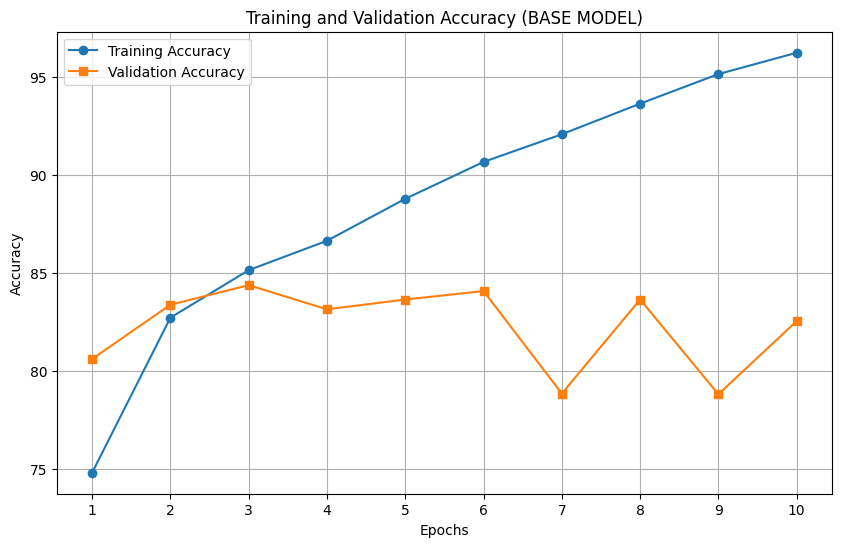

In [ ]:
'''
Plot the training and validation accuracy over time (epochs).
'''

# Plotting training and validation accuracy over epochs

# BASE MODEL
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies_base) + 1), train_accuracies_base, label='Training Accuracy', marker='o')
plt.plot(range(1, len(valid_accuracies_base) + 1), valid_accuracies_base, label='Validation Accuracy', marker='s')
plt.title('Training and Validation Accuracy (BASE MODEL)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(train_accuracies_base) + 1))
plt.legend()
plt.grid(True)
plt.show()

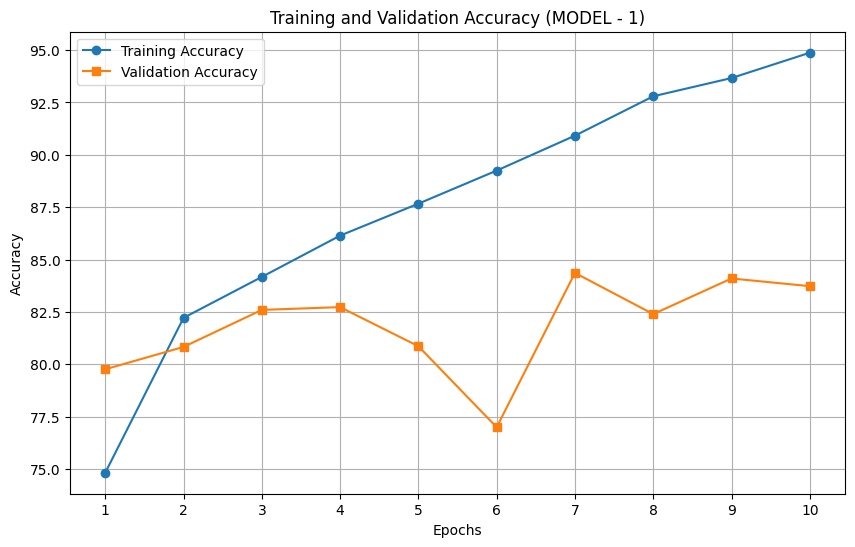

In [ ]:
# MODEL - 1
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies_1) + 1), train_accuracies_1, label='Training Accuracy', marker='o')
plt.plot(range(1, len(valid_accuracies_1) + 1), valid_accuracies_1, label='Validation Accuracy', marker='s')
plt.title('Training and Validation Accuracy (MODEL - 1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(train_accuracies_1) + 1))
plt.legend()
plt.grid(True)
plt.show()

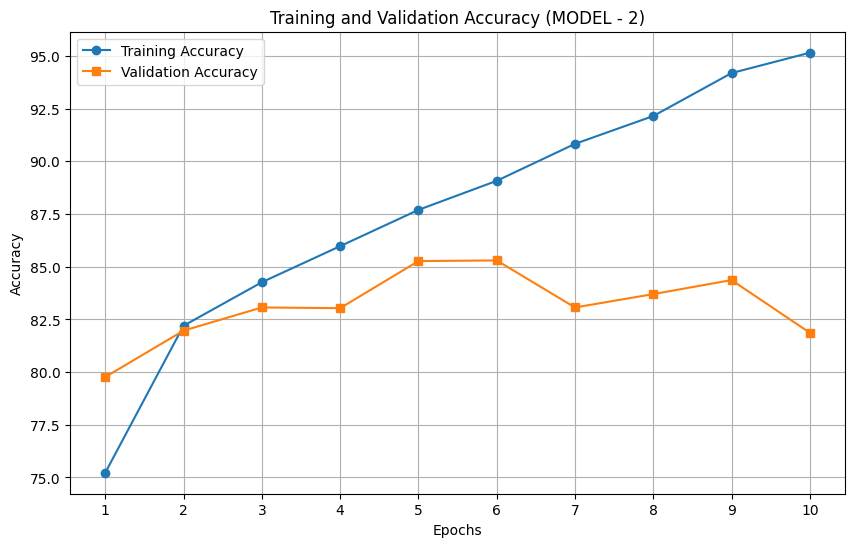

In [ ]:
# MODEL - 2
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies_2) + 1), train_accuracies_2, label='Training Accuracy', marker='o')
plt.plot(range(1, len(valid_accuracies_2) + 1), valid_accuracies_2, label='Validation Accuracy', marker='s')
plt.title('Training and Validation Accuracy (MODEL - 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(train_accuracies_2) + 1))
plt.legend()
plt.grid(True)
plt.show()

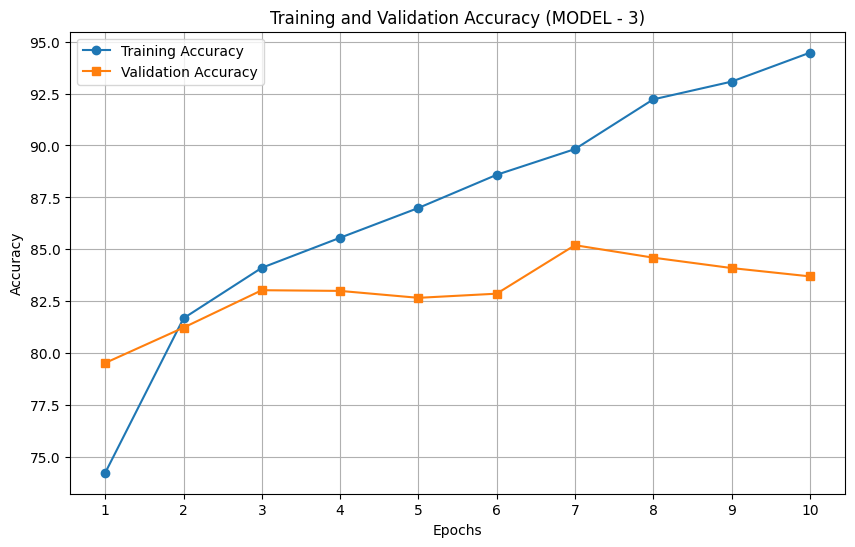

In [ ]:
# MODEL - 3
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies_3) + 1), train_accuracies_3, label='Training Accuracy', marker='o')
plt.plot(range(1, len(valid_accuracies_3) + 1), valid_accuracies_3, label='Validation Accuracy', marker='s')
plt.title('Training and Validation Accuracy (MODEL - 3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(train_accuracies_3) + 1))
plt.legend()
plt.grid(True)
plt.show()

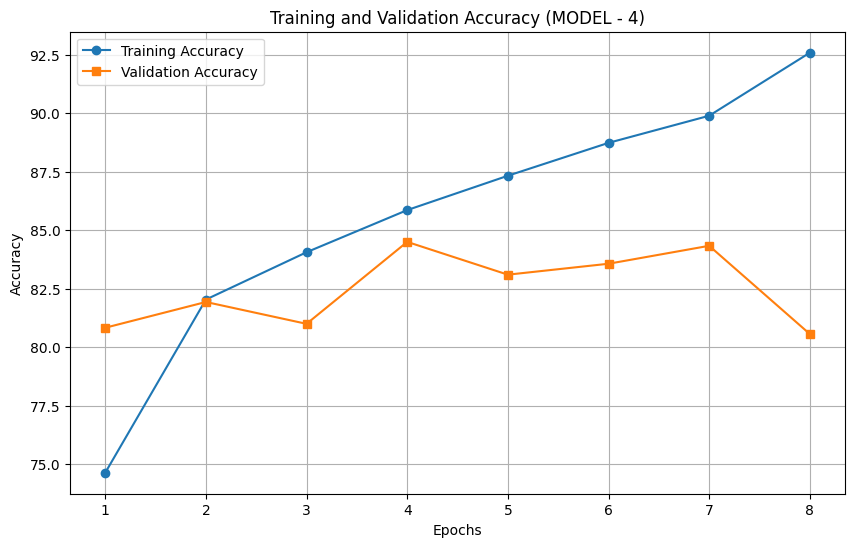

In [ ]:
# MODEL - 4
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies_4) + 1), train_accuracies_4, label='Training Accuracy', marker='o')
plt.plot(range(1, len(valid_accuracies_4) + 1), valid_accuracies_4, label='Validation Accuracy', marker='s')
plt.title('Training and Validation Accuracy (MODEL - 4)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(train_accuracies_4) + 1))
plt.legend()
plt.grid(True)
plt.show()

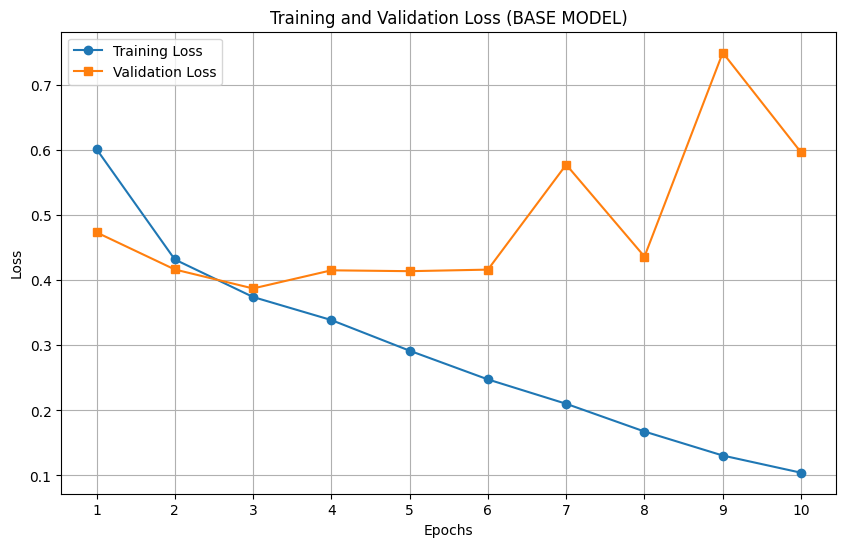

In [ ]:
'''
Plot the training and validation loss over time (epochs).
'''

# BASE MODEL

# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses_base) + 1), train_losses_base, label='Training Loss', marker='o')
plt.plot(range(1, len(valid_losses_base) + 1), valid_losses_base, label='Validation Loss', marker='s')
plt.title('Training and Validation Loss (BASE MODEL)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(train_losses_base) + 1))
plt.legend()
plt.grid(True)
plt.show()

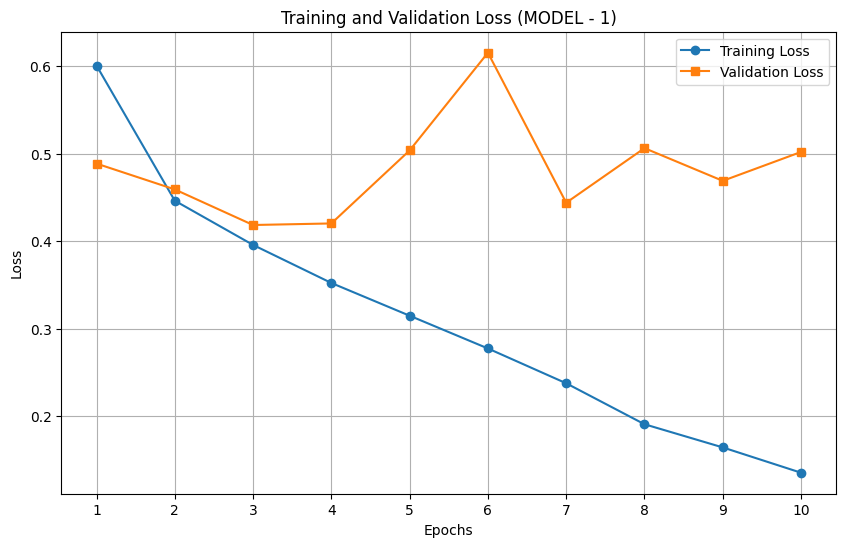

In [ ]:
# MODEL - 1

# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses_1) + 1), train_losses_1, label='Training Loss', marker='o')
plt.plot(range(1, len(valid_losses_1) + 1), valid_losses_1, label='Validation Loss', marker='s')
plt.title('Training and Validation Loss (MODEL - 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(train_losses_1) + 1))
plt.legend()
plt.grid(True)
plt.show()

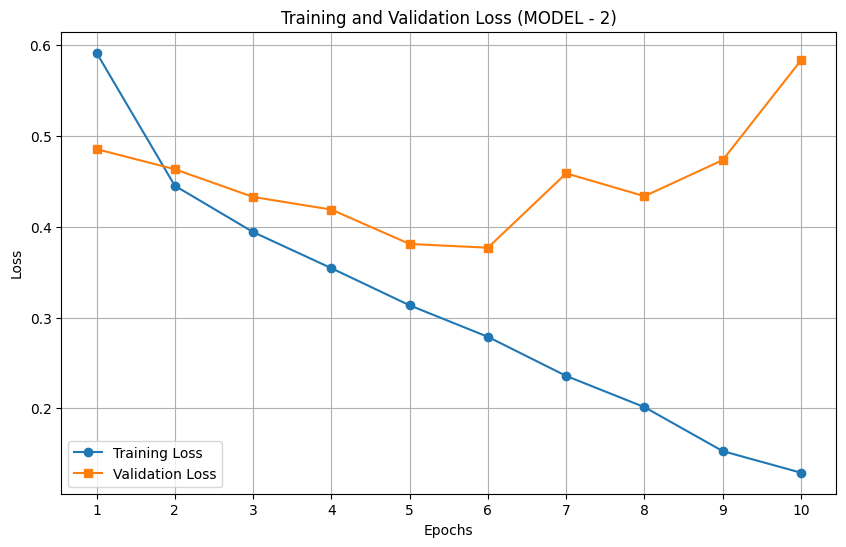

In [ ]:
# MODEL - 2

# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses_2) + 1), train_losses_2, label='Training Loss', marker='o')
plt.plot(range(1, len(valid_losses_2) + 1), valid_losses_2, label='Validation Loss', marker='s')
plt.title('Training and Validation Loss (MODEL - 2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(train_losses_2) + 1))
plt.legend()
plt.grid(True)
plt.show()

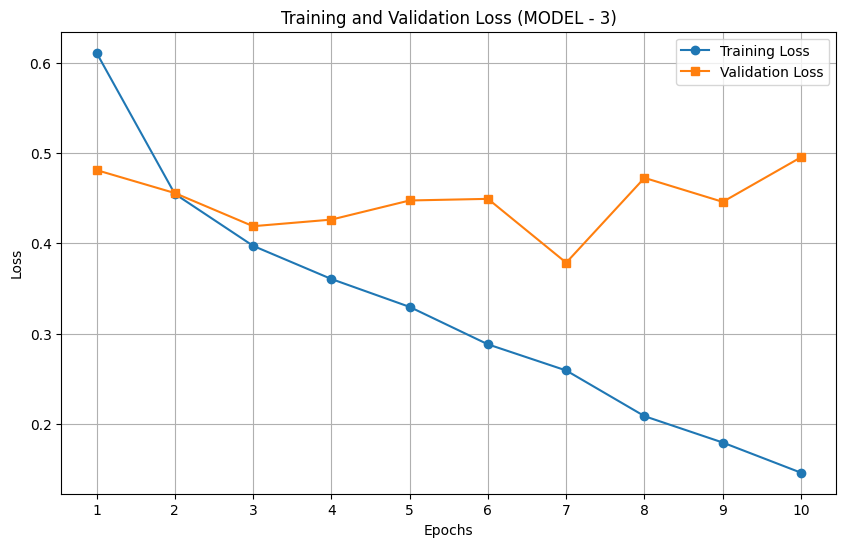

In [ ]:
# MODEL - 3

# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses_3) + 1), train_losses_3, label='Training Loss', marker='o')
plt.plot(range(1, len(valid_losses_3) + 1), valid_losses_3, label='Validation Loss', marker='s')
plt.title('Training and Validation Loss (MODEL - 3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(train_losses_3) + 1))
plt.legend()
plt.grid(True)
plt.show()

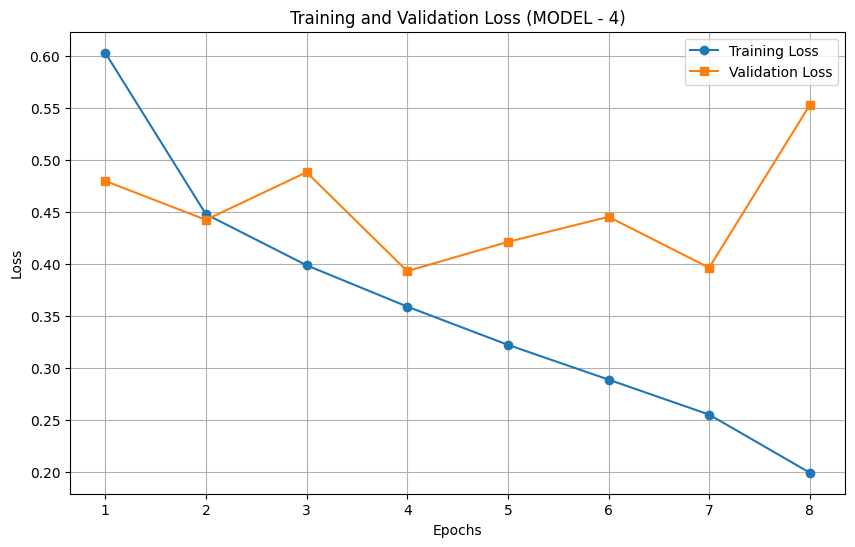

In [ ]:
# MODEL - 4

# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses_4) + 1), train_losses_4, label='Training Loss', marker='o')
plt.plot(range(1, len(valid_losses_4) + 1), valid_losses_4, label='Validation Loss', marker='s')
plt.title('Training and Validation Loss (MODEL - 4)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(train_losses_4) + 1))
plt.legend()
plt.grid(True)
plt.show()

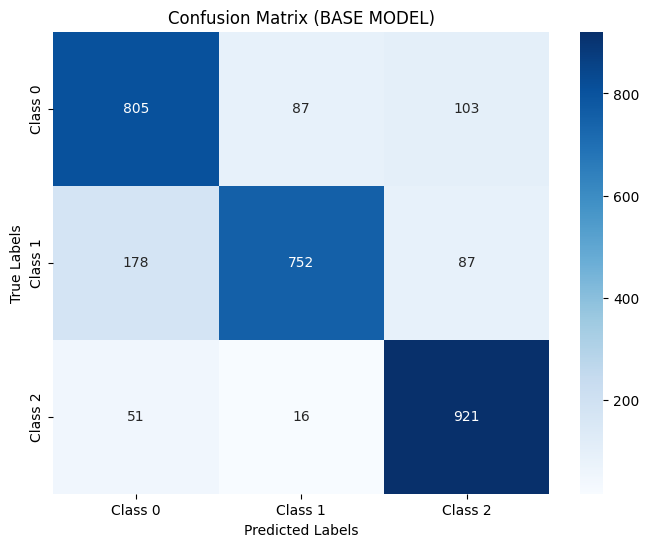

In [ ]:
'''
Generate a confusion matrix using the model's predictions on the test set.
'''

from sklearn.metrics import confusion_matrix

# BASE MODEL

# Generating confusion matrix
conf_matrix_base = confusion_matrix(test_true_labels_base, test_predicted_labels_base)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_base, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix (BASE MODEL)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

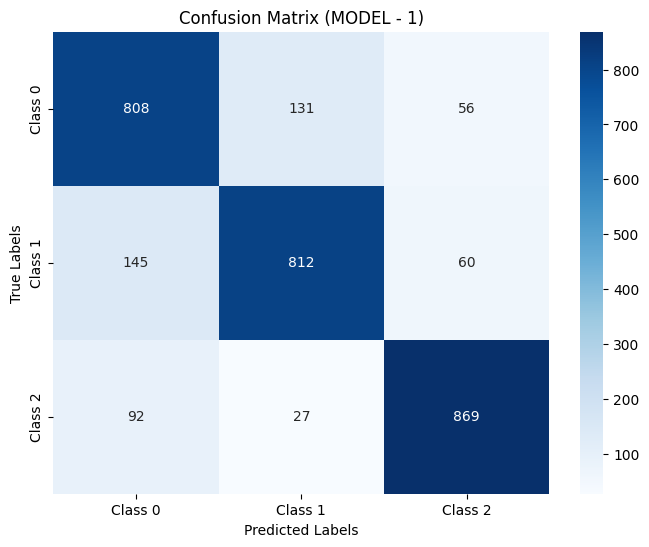

In [ ]:
# MODEL - 1

# Generating confusion matrix
conf_matrix_1 = confusion_matrix(test_true_labels_1, test_predicted_labels_1)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix (MODEL - 1)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

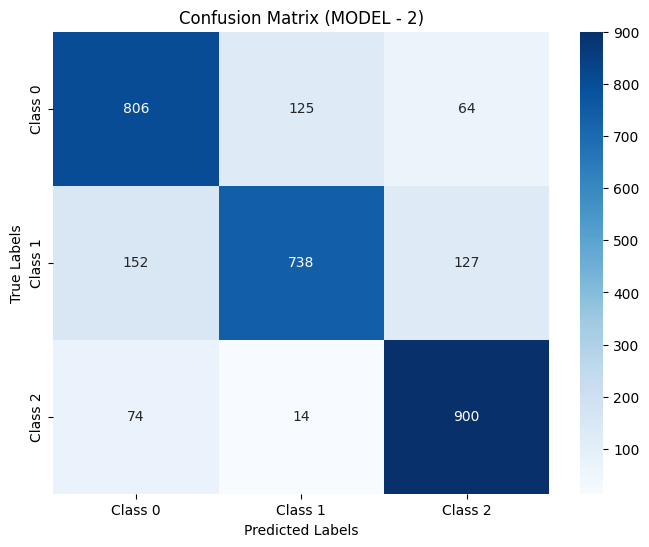

In [ ]:
# MODEL - 2

# Generating confusion matrix
conf_matrix_2 = confusion_matrix(test_true_labels_2, test_predicted_labels_2)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix (MODEL - 2)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

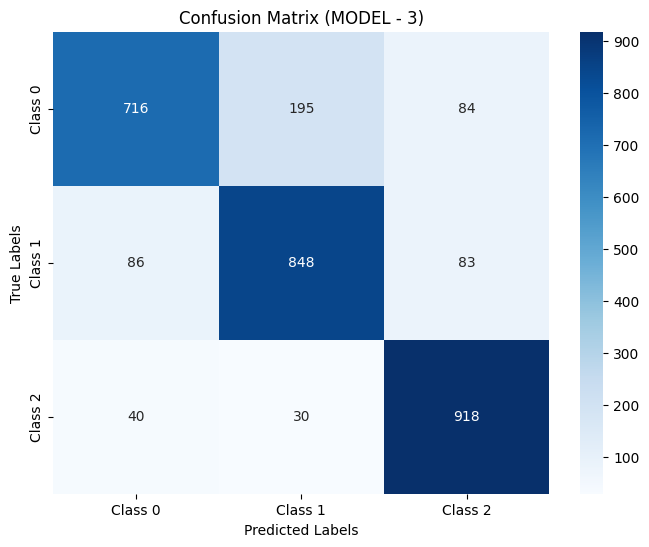

In [ ]:
# MODEL - 3

# Generating confusion matrix
conf_matrix_3 = confusion_matrix(test_true_labels_3, test_predicted_labels_3)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_3, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix (MODEL - 3)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

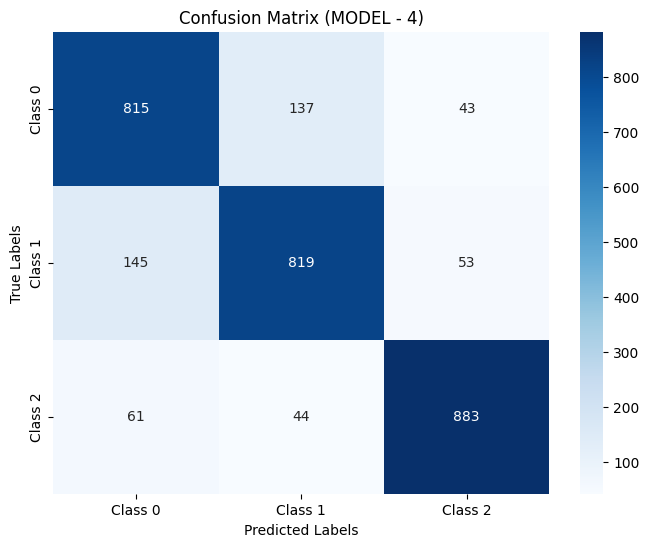

In [ ]:
# MODEL - 4

# Generating confusion matrix
conf_matrix_4 = confusion_matrix(test_true_labels_4, test_predicted_labels_4)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_4, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix (MODEL - 4)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
'''
Calculate and report other evaluation metrics such as Precision, recall and F1
score (more details). You can use sklearn.metrics.precision_recall_fscore_support
'''

from sklearn.metrics import precision_recall_fscore_support

# BASE MODEL

# Calculating precision, recall, f1 score, and support
precision, recall, f1_score, _ = precision_recall_fscore_support(test_true_labels_base, test_predicted_labels_base, average='weighted')

# Printing the metrics
print("BASE MODEL 🔻\n")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

BASE MODEL 🔻

Precision: 0.8293855482636731
Recall: 0.826
F1 Score: 0.8245445992972894


In [ ]:
# MODEL - 1

# Calculating precision, recall, f1 score, and support
precision_1, recall_1, f1_score_1, _ = precision_recall_fscore_support(test_true_labels_1, test_predicted_labels_1, average='weighted')

# Printing the metrics
print("MODEL - 1 🔻\n")
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1 Score:", f1_score_1)

MODEL - 1 🔻

Precision: 0.8307769144410605
Recall: 0.8296666666666667
F1 Score: 0.8299080869948048


In [ ]:
# MODEL - 2

# Calculating precision, recall, f1 score, and support
precision_2, recall_2, f1_score_2, _ = precision_recall_fscore_support(test_true_labels_2, test_predicted_labels_2, average='weighted')

# Printing the metrics
print("MODEL - 2 🔻\n")
print("Precision:", precision_2)
print("Recall:", recall_2)
print("F1 Score:", f1_score_2)

MODEL - 2 🔻

Precision: 0.8159818373987594
Recall: 0.8146666666666667
F1 Score: 0.8130833623135416


In [ ]:
# MODEL - 3

# Calculating precision, recall, f1 score, and support
precision_3, recall_3, f1_score_3, _ = precision_recall_fscore_support(test_true_labels_3, test_predicted_labels_3, average='weighted')

# Printing the metrics
print("MODEL - 3 🔻\n")
print("Precision:", precision_3)
print("Recall:", recall_3)
print("F1 Score:", f1_score_3)

MODEL - 3 🔻

Precision: 0.8285924147470675
Recall: 0.8273333333333334
F1 Score: 0.8253191725302398


In [ ]:
# MODEL - 4

# Calculating precision, recall, f1 score, and support
precision_4, recall_4, f1_score_4, _ = precision_recall_fscore_support(test_true_labels_4, test_predicted_labels_4, average='weighted')

# Printing the metrics
print("MODEL - 4 🔻\n")
print("Precision:", precision_4)
print("Recall:", recall_4)
print("F1 Score:", f1_score_4)

MODEL - 4 🔻

Precision: 0.8394287680723866
Recall: 0.839
F1 Score: 0.839144025321685


In [ ]:
# In future we may need the normalized data images AND the integer labels
# Thus we need to save them

import pickle

# Saving the normalized_data_images and integer_labels

# Using pickle
with open('/content/drive/MyDrive/Datasets/dataset_dl_Part1.pkl', 'wb') as f:
    pickle.dump((normalized_data_images, integer_labels), f)

In [ ]:
# If I ever need to import and load the dataset - I need to do
# the following :

'''
import pickle

# Loading the dataset

# Using pickle
with open('/content/drive/MyDrive/Datasets/dataset_dl_Part1.pkl', 'rb') as f:
    normalized_data_images, integer_labels = pickle.load(f)
'''

"\nimport pickle\n\n# Loading the dataset\n\n# Using pickle\nwith open('/content/drive/MyDrive/Datasets/dataset_dl_Part1.pkl', 'rb') as f:\n    normalized_data_images, integer_labels = pickle.load(f)\n"